In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
import itertools
from sklearn.model_selection import train_test_split
import time

Using TensorFlow backend.


In [2]:
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, shuffle = True)


<h>First network- very big!(already tuned the eta)</h>

loss: 1.03
time: 435.412139


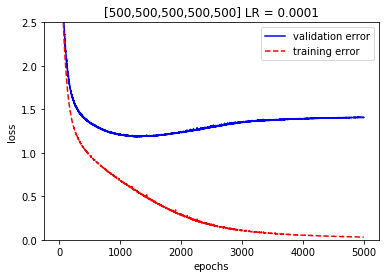

1.032862374663253

In [11]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Second Netowrk- smaller (already tuned the eta)

loss: 1.00
time: 304.826204


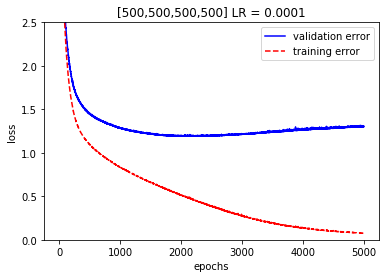

1.004419310437403

In [12]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 56.785615


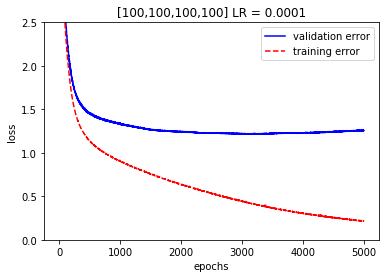

1.0274254656959132

In [13]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100, 100], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.05
time: 39.763056


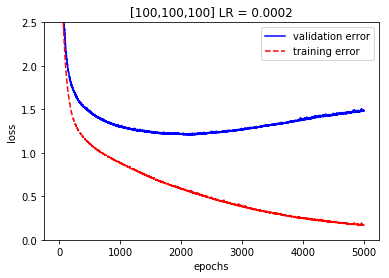

1.0517821533921312

In [19]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.01
time: 34.997588


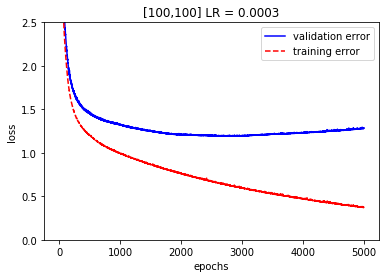

1.0058196672291897

In [21]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 26.886306


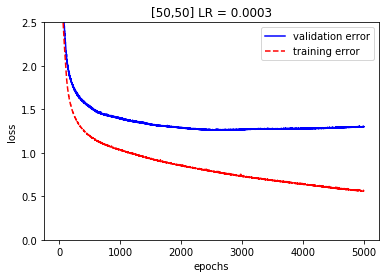

1.0274224725360792

In [24]:
NN = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Now we implement the cross validation: we have writtena funciton that implements it by himself.

In [3]:
SMALL = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 2600)
MEDIUM = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 1500)
BIG = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 1000)

we find out that the minimun is reached after 2600 epochs in average

In [4]:
start = time.time()
smallval, smalltrain = SMALL.trainCV(X, Y, plot=False)
smalltime = time.time()- start

kerasNN

No Drop out in the input layer
No drop out in the hidden layer
Min loss on validation set was on epoch 2448
Min loss on validation set was on epoch 1909
Min loss on validation set was on epoch 2594
Min loss on validation set was on epoch 2562
Min loss on validation set was on epoch 2592

 Time: 54.30
1.25 (+/- 0.08)
0.96 (+/- 0.02)


we find out that the minimun is reached after 1500 epochs in average

In [5]:
start = time.time()
mediumval, mediumtrain = MEDIUM.trainCV(X, Y, plot=False)
mediumtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 1362
Min loss on validation set was on epoch 1468
Min loss on validation set was on epoch 1374
Min loss on validation set was on epoch 1477
Min loss on validation set was on epoch 1495

 Time: 67.38
1.23 (+/- 0.07)
0.92 (+/- 0.01)


we find out that the minimun is reached after 1000 epochs in average

In [6]:
start = time.time()
bigval, bigtrain = BIG.trainCV(X, Y, plot=False)
bigtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 984
Min loss on validation set was on epoch 995
Min loss on validation set was on epoch 970
Min loss on validation set was on epoch 998
Min loss on validation set was on epoch 987

 Time: 390.56
1.20 (+/- 0.07)
0.89 (+/- 0.01)


In [8]:
d = {"name": ["2L50", "3L100", "5L500"], 
     'validation Mean Error': [np.mean(smallval), np.mean(mediumval),np.mean(bigval)], 
     'validation std Error': [np.std(smallval), np.std(mediumval),np.std(bigval)], 
     'Training Mean Error':  [np.mean(smalltrain), np.mean(mediumtrain),np.mean(bigtrain)], 
     'Training std Error':  [np.std(smalltrain), np.std(mediumtrain),np.std(mediumtrain)], 
     "time": [smalltime/5, mediumtime/5, bigtime/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidation.csv")
df.to_latex("../LatexTable/NNCrossValidation.txt")

In [9]:
df.to_csv("../result/NNCrossValidation.csv")

In [10]:
df.to_latex("../LatexTable/NNCrossValidation.txt")

We now train a network with dropout

Min loss on validation set was on epoch 382
loss: 0.94
time: 759.928046


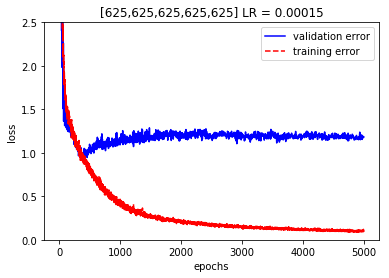

0.9420232205182834

In [51]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Min loss on validation set was on epoch 337
loss: 0.98
time: 58.938208


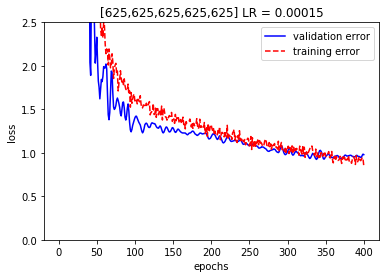

0.9784420602948911

In [50]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

In [11]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

Min loss on validation set was on epoch 396
Min loss on validation set was on epoch 497
Min loss on validation set was on epoch 3071
Min loss on validation set was on epoch 4884
Min loss on validation set was on epoch 546

 Time: 3930.50
1.06 (+/- 0.07)
0.26 (+/- 0.05)


In [16]:
d = {"name": ["5L5000+Dropout(0.8)", "5L500+Dropout(0.8)", "5L1000+Dropout(0.8)"], 
     'validation Mean Error': [np.mean(valdd), np.mean(valddsmall), np.mean(valddbig)], 
     'validation std Error': [np.std(valdd), np.std(valddsmall), np.std(valddbig)], 
     'Training Mean Error':  [np.mean(traindd), np.mean(trainddsmall), np.mean(trainddbig)], 
     'Training std Error':  [np.std(traindd), np.std(trainddsmall), np.std(trainddbig)], 
     "time": [timedd/5, timeddsmal/5, timeddbig/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidationDropOut.csv")
df.to_latex("../LatexTable/NNCrossValidationDropOut.txt")

loss: 0.94
time: 1631.579569


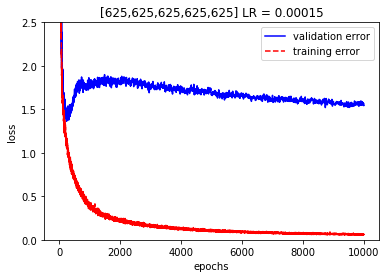

0.9411691622857817

In [30]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

In [12]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
valddsmall, trainddsmall = NNDropOut.trainCV(X, Y, plot=False)
timeddsmal = time.time() - start

kerasNN

Min loss on validation set was on epoch 310
Min loss on validation set was on epoch 399
Min loss on validation set was on epoch 388
Min loss on validation set was on epoch 150
Min loss on validation set was on epoch 271

 Time: 302.32
1.15 (+/- 0.08)
0.88 (+/- 0.05)


In [13]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
valddbig, trainddbig = NNDropOut.trainCV(X, Y, plot=False)
timeddbig = time.time() - start

kerasNN

Min loss on validation set was on epoch 408
Min loss on validation set was on epoch 9460
Min loss on validation set was on epoch 9606
Min loss on validation set was on epoch 9924
Min loss on validation set was on epoch 588

 Time: 7960.48
1.03 (+/- 0.07)
0.21 (+/- 0.02)
